In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [252]:
df = pd.read_csv("/kaggle/input/student-dataset/student-mat.csv" , sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [253]:
df.shape

(395, 33)

In [254]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [255]:
x = df.iloc[: , 0:32]
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,14,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,10,8
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11,12


In [256]:
y_reg = df.iloc[: , -1]
y_class = y_reg.apply(lambda g:1 if g>10 else 0)

In [257]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])

In [258]:
x


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x['age'] = sc.fit_transform(x['age'].values.reshape(-1, 1))
x['Medu'] = sc.fit_transform(x['Medu'].values.reshape(-1, 1))
x['Fedu'] = sc.fit_transform(x['Fedu'].values.reshape(-1, 1))
x['Mjob'] = sc.fit_transform(x['Mjob'].values.reshape(-1, 1))
x['Fjob'] = sc.fit_transform(x['Fjob'].values.reshape(-1, 1))
x['famrel'] = sc.fit_transform(x['famrel'].values.reshape(-1, 1))
x['freetime'] = sc.fit_transform(x['freetime'].values.reshape(-1, 1))
x['goout'] = sc.fit_transform(x['goout'].values.reshape(-1, 1))
x['Dalc'] = sc.fit_transform(x['Dalc'].values.reshape(-1, 1))
x['Walc'] = sc.fit_transform(x['Walc'].values.reshape(-1, 1))
x['health'] = sc.fit_transform(x['health'].values.reshape(-1, 1))
x['absences'] = sc.fit_transform(x['absences'].values.reshape(-1, 1))
x['G1'] = sc.fit_transform(x['G1'].values.reshape(-1, 1))
x['G2'] = sc.fit_transform(x['G2'].values.reshape(-1, 1))

In [260]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,1.023046,1,0,0,1.143856,1.360371,-1.769793,1.993149,...,0,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791
1,0,0,0.238380,1,0,1,-1.600009,-1.399970,-1.769793,-0.325831,...,0,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979
2,0,0,-1.330954,1,1,1,-1.600009,-1.399970,-1.769793,-0.325831,...,0,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415
3,0,0,-1.330954,1,0,1,1.143856,-0.479857,-0.954077,0.833659,...,1,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715
4,0,0,-0.546287,1,0,1,0.229234,0.440257,-0.138362,-0.325831,...,0,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,2.592380,1,1,0,-0.685387,-0.479857,0.677354,0.833659,...,0,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226
391,1,1,0.238380,1,1,1,0.229234,-1.399970,0.677354,0.833659,...,0,-2.171138,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.932473,1.407091
392,1,1,3.377047,0,0,1,-1.600009,-1.399970,-0.138362,-0.325831,...,0,1.178860,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-0.274167,-0.722415
393,1,1,1.023046,0,1,1,0.229234,-0.479857,0.677354,-0.325831,...,0,0.062194,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.027493,0.342338


In [261]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y_class , test_size = 0.25 , random_state = 42)

In [262]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [263]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [264]:
y_test

78     0
371    1
248    0
55     0
390    0
      ..
367    0
210    0
75     0
104    1
374    1
Name: G3, Length: 99, dtype: int64

In [265]:
y_train.shape

(296,)

In [266]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import cross_val_score
cf_dtc = confusion_matrix(y_test , y_pred)
acc_dtc = accuracy_score(y_test , y_pred)
cr_dtc = classification_report(y_test, y_pred)
cv_dtc = cross_val_score(dtc , x , y_class , cv = 5)
print("cross validation score : ",cv_dtc.mean())
print("accuracy : ",acc_dtc)
print("confusion matrix : ",cf_dtc)
print("classification report : ",cr_dtc)

cross validation score :  0.8911392405063292
accuracy :  0.9292929292929293
confusion matrix :  [[47  2]
 [ 5 45]]
classification report :                precision    recall  f1-score   support

           0       0.90      0.96      0.93        49
           1       0.96      0.90      0.93        50

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



In [267]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train)

SVC()

In [268]:
y_pred1 = svc.predict(x_test)

In [269]:
cf_svc = confusion_matrix(y_test , y_pred1)
acc_svc = accuracy_score(y_test , y_pred1)
cr_svc = classification_report(y_test, y_pred1)
cv_svc = cross_val_score(svc , x , y_class , cv = 5)
print("cross validation score : ",cv_svc.mean())
print("accuracy : ",acc_svc)
print("confusion matrix : ",cf_svc)
print("classification report : ",cr_svc)

cross validation score :  0.8962025316455696
accuracy :  0.9696969696969697
confusion matrix :  [[46  3]
 [ 0 50]]
classification report :                precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.94      1.00      0.97        50

    accuracy                           0.97        99
   macro avg       0.97      0.97      0.97        99
weighted avg       0.97      0.97      0.97        99



In [270]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [271]:
y_pred2 = knn.predict(x_test)

In [272]:
acc_knn = accuracy_score(y_test , y_pred2)
cf_knn = confusion_matrix(y_test , y_pred2)
cr_knn = classification_report(y_test , y_pred2)
cv_knn = cross_val_score(knn , x , y_class , cv = 5)
print("cross validation score : ",cv_knn.mean())
print("accuracy : ",acc_knn)
print("confusion matrix : ",cf_knn)
print("classification report : ",cr_knn)

cross validation score :  0.8202531645569622
accuracy :  0.8080808080808081
confusion matrix :  [[36 13]
 [ 6 44]]
classification report :                precision    recall  f1-score   support

           0       0.86      0.73      0.79        49
           1       0.77      0.88      0.82        50

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.81        99
weighted avg       0.81      0.81      0.81        99



In [273]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [274]:
y_pred3 = lr.predict(x_test)

In [275]:
acc_lr = accuracy_score(y_test , y_pred3)
cf_lr = confusion_matrix(y_test , y_pred3)
cr_lr = classification_report(y_test , y_pred3)
cv_lr = cross_val_score(lr , x , y_class , cv = 5)
print("cross validation score : ",cv_lr.mean())
print("accuracy : ",acc_lr)
print("confusion matrix : ",cf_lr)
print("classification report : ",cr_lr)

cross validation score :  0.9037974683544304
accuracy :  0.9393939393939394
confusion matrix :  [[45  4]
 [ 2 48]]
classification report :                precision    recall  f1-score   support

           0       0.96      0.92      0.94        49
           1       0.92      0.96      0.94        50

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99



In [276]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train , y_train)

GaussianNB()

In [277]:
y_pred4 = nb.predict(x_test)

In [278]:
acc_nb = accuracy_score(y_test , y_pred4)
cf_nb = confusion_matrix(y_test , y_pred4)
cr_nb = classification_report(y_test , y_pred4)
cv_nb = cross_val_score(nb , x , y_class , cv = 5)
print("cross validation score : ",cv_nb.mean())
print("accuracy : ",acc_nb)
print("confusion matrix : ",cf_nb)
print("classification report : ",cr_nb)

cross validation score :  0.8481012658227847
accuracy :  0.898989898989899
confusion matrix :  [[40  9]
 [ 1 49]]
classification report :                precision    recall  f1-score   support

           0       0.98      0.82      0.89        49
           1       0.84      0.98      0.91        50

    accuracy                           0.90        99
   macro avg       0.91      0.90      0.90        99
weighted avg       0.91      0.90      0.90        99



In [279]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [280]:
y_pred5 = rf.predict(x_test)

In [281]:
acc_rf = accuracy_score(y_test , y_pred5)
cf_rf = confusion_matrix(y_test , y_pred5)
cr_rf = classification_report(y_test , y_pred5)
cv_rf = cross_val_score(rf , x , y_class , cv = 5)
print("cross validation score : ",cv_rf.mean())
print("accuracy : ",acc_rf)
print("confusion matrix : ",cf_rf)
print("classification report : ",cr_rf)

cross validation score :  0.9341772151898734
accuracy :  0.9797979797979798
confusion matrix :  [[47  2]
 [ 0 50]]
classification report :                precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.96      1.00      0.98        50

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



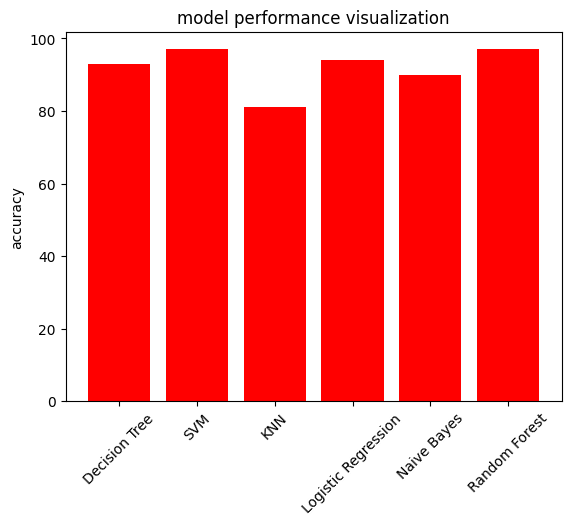

In [282]:
models = ['Decision Tree', 'SVM', 'KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies = [93 , 97 , 81 , 94 , 90 , 97]  
plt.bar(models , accuracies , color = "red")
plt.title("model performance visualization")
plt.ylabel("accuracy")
plt.xticks(rotation = 45)
plt.show()

In [283]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [284]:
columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']

In [285]:
value = ['GP' , 'F' , 19 , "U" , "GT3" , "T" , 2 , 2 , "at_home" , "other" , "close to home" , "mother" , 15 , 2 , 4 , "no" , "yes" , "yes" , "yes" , "no" , "yes" , "yes" , "no" , 4 , 4 , 2 , 0 , 0 , 5 , 40 , 13 , 16]

In [286]:
df2 = pd.DataFrame([value] , columns = columns)
for col in df2.columns:
    if df2[col].dtype == "object":
        df2[col] = le.fit_transform(df2[col])
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,19,0,0,0,2,2,0,0,...,0,4,4,2,0,0,5,40,13,16


In [287]:
df2['age'] = sc.fit_transform(df2['age'].values.reshape(-1, 1))
df2['Medu'] = sc.fit_transform(df2['Medu'].values.reshape(-1, 1))
df2['Fedu'] = sc.fit_transform(df2['Fedu'].values.reshape(-1, 1))
df2['Mjob'] = sc.fit_transform(df2['Mjob'].values.reshape(-1, 1))
df2['Fjob'] = sc.fit_transform(df2['Fjob'].values.reshape(-1, 1))
df2['famrel'] = sc.fit_transform(df2['famrel'].values.reshape(-1, 1))
df2['freetime'] = sc.fit_transform(df2['freetime'].values.reshape(-1, 1))
df2['goout'] = sc.fit_transform(df2['goout'].values.reshape(-1, 1))
df2['Dalc'] = sc.fit_transform(df2['Dalc'].values.reshape(-1, 1))
df2['Walc'] = sc.fit_transform(df2['Walc'].values.reshape(-1, 1))
df2['health'] = sc.fit_transform(df2['health'].values.reshape(-1, 1))
df2['absences'] = sc.fit_transform(df2['absences'].values.reshape(-1, 1))
df2['G1'] = sc.fit_transform(df2['G1'].values.reshape(-1, 1))
df2['G2'] = sc.fit_transform(df2['G2'].values.reshape(-1, 1))
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [288]:
print(dtc.predict(df2) , svc.predict(df2) , knn.predict(df2) , lr.predict(df2) , rf.predict(df2) , nb.predict(df2))

[1] [0] [0] [0] [0] [0]


In [289]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x , y_reg , test_size = 0.25 , random_state = 42)

In [290]:
from sklearn.linear_model import LinearRegression
lrr = LinearRegression()
lrr.fit(x_train1 , y_train1)

LinearRegression()

In [291]:
y_pred6 = lrr.predict(x_test1)

In [292]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
mae_lrr = mean_absolute_error(y_test1 , y_pred6)
mse_lrr = mean_squared_error(y_test1 , y_pred6)
r2_lrr = r2_score(y_test1 , y_pred6)
print("mae : ",mae_lrr)
print("mse : ",mse_lrr)
print("r2 : ",r2_lrr) 

mae :  1.382405099475637
mse :  4.568258792977689
r2 :  0.8017064030489104


In [293]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train1 , y_train1)

DecisionTreeRegressor()

In [294]:
y_pred7 = dtr.predict(x_test1)

In [295]:
mae_dtr = mean_absolute_error(y_test1 , y_pred7)
mse_dtr = mean_squared_error(y_test1 , y_pred7)
r2_dtr = r2_score(y_test1 , y_pred7)
print("mae : ",mae_dtr)
print("mse : ",mse_dtr)
print("r2 : ",r2_dtr) 

mae :  1.3333333333333333
mse :  5.5353535353535355
r2 :  0.7597278935667025


In [296]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train1 , y_train1)

RandomForestRegressor()

In [297]:
y_pred8 = rfr.predict(x_test1)

In [298]:
mae_rfr = mean_absolute_error(y_test1 , y_pred8)
mse_rfr = mean_squared_error(y_test1 , y_pred8)
r2_rfr = r2_score(y_test1 , y_pred8)
print("mae : ",mae_rfr)
print("mse : ",mse_rfr)
print("r2 : ",r2_rfr) 

mae :  1.0508080808080809
mse :  2.998972727272727
r2 :  0.869824124201706


In [299]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(x_train1 , y_train1)

SVR()

In [300]:
y_pred9 = svr.predict(x_test1)

In [301]:
mae_svr = mean_absolute_error(y_test1 , y_pred9)
mse_svr = mean_squared_error(y_test1 , y_pred9)
r2_svr = r2_score(y_test1 , y_pred9)
print("mae : ",mae_svr)
print("mse : ",mse_svr)
print("r2 : ",r2_svr) 

mae :  1.5838462730962928
mse :  6.330623088911674
r2 :  0.7252077694959861


In [302]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train1 , y_train1)

KNeighborsRegressor()

In [303]:
y_pred10 = knr.predict(x_test1)

In [304]:
mae_knr = mean_absolute_error(y_test1 , y_pred10)
mse_knr = mean_squared_error(y_test1 , y_pred10)
r2_knr = r2_score(y_test1 , y_pred10)
print("mae : ",mae_knr)
print("mse : ",mse_knr)
print("r2 : ",r2_knr) 

mae :  2.216161616161616
mse :  8.555555555555555
r2 :  0.6286305216259068


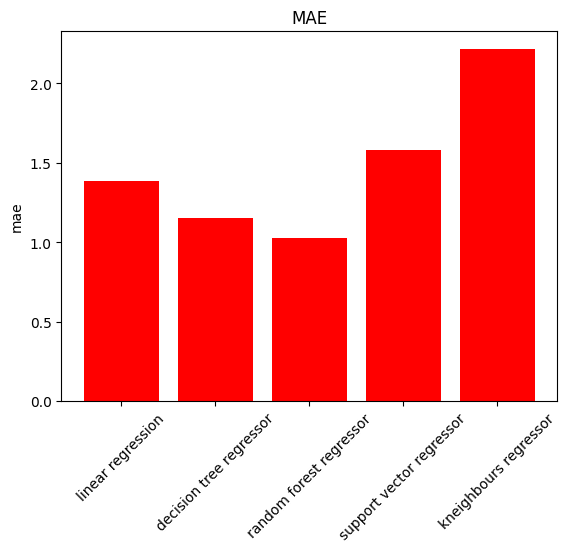

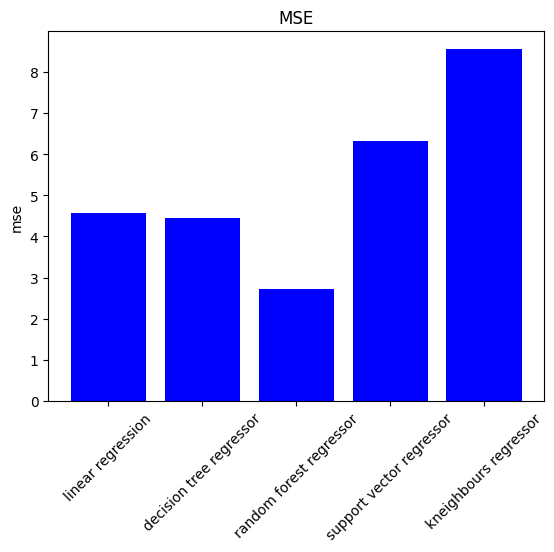

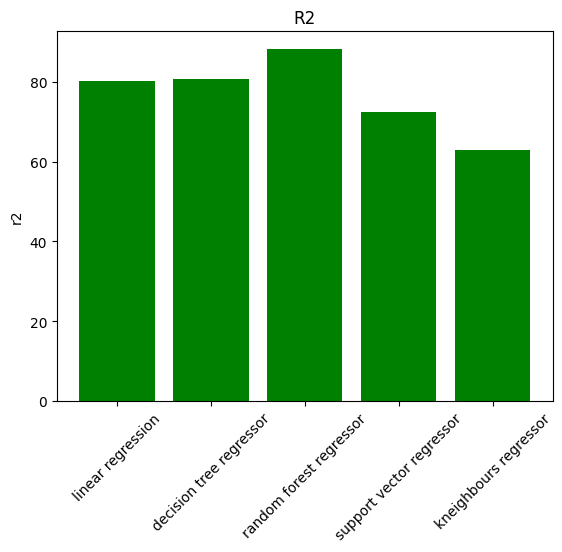

In [305]:
models = ["linear regression" , "decision tree regressor" , "random forest regressor" , "support vector regressor" , "kneighbours regressor"]
mae = [1.382 , 1.151 , 1.026 , 1.583 , 2.216]
mse = [4.568 , 4.444 , 2.720 , 6.330 , 8.555]
r2 = [80.17 , 80.70 , 88.18 , 72.52 , 62.86]

plt.bar(models , mae , color = "red")
plt.title("MAE")
plt.ylabel("mae")
plt.xticks(rotation = 45)
plt.show()

plt.bar(models , mse , color = "blue")
plt.title("MSE")
plt.ylabel("mse")
plt.xticks(rotation = 45)
plt.show()

plt.bar(models , r2 , color = "green")
plt.title("R2")
plt.ylabel("r2")
plt.xticks(rotation = 45)
plt.show()

In [306]:
print(lrr.predict(df2) , dtr.predict(df2) , rfr.predict(df2) , svr.predict(df2) , knr.predict(df2))

[11.41412814] [11.] [10.78] [10.54257804] [5.4]


In [307]:
models1 = ["decision tree" , "svm" , "knn" , "logistic regression" , "naive bayes" , "random forest"]
cvs = [89.11 , 89.62 , 82.02 , 90.37 , 84.81 , 93.67]
a = [92 , 97 , 81 , 94 , 90 , 96]
pd1 = pd.DataFrame({
    "models" : models1,
    "cross validation score" : cvs,
    "accuracy" : a
})
print(pd1)

                models  cross validation score  accuracy
0        decision tree                   89.11        92
1                  svm                   89.62        97
2                  knn                   82.02        81
3  logistic regression                   90.37        94
4          naive bayes                   84.81        90
5        random forest                   93.67        96


In [308]:
models2 = ["linear regression" , "decision tree regressor" , "random forest regressor" , "support vector regressor" , "k neighbours regressor"]
mae = [1.382 , 1.151 , 1.026 , 1.583 , 2.216]
mse = [4.568 , 4.444 , 2.720 , 6.330 , 8.555]
r2 = [80.17 , 80.70 , 88.18 , 72.52 , 62.86]
pd2 = pd.DataFrame({
    "models" : models2,
    "mae" : mae,
    "mse" : mse,
    "r2" : r2
})
print(pd2)

                     models    mae    mse     r2
0         linear regression  1.382  4.568  80.17
1   decision tree regressor  1.151  4.444  80.70
2   random forest regressor  1.026  2.720  88.18
3  support vector regressor  1.583  6.330  72.52
4    k neighbours regressor  2.216  8.555  62.86
